### Работа с данными в Pandas

In [1]:
import pandas as pd
import numpy as np

#### Обзор типов данных

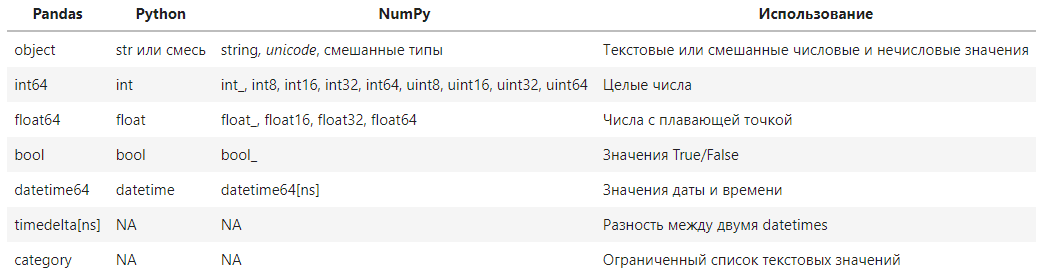

In [2]:
df = pd.read_excel('example.xlsx')
df # обратите внимание на возраст Екатерины

,name,age,smoke
0,Anna,20,0
1,Petr,30,1
2,Ivan,25,0
3,Ekaterina,?,1
4,Kirill,35,1
5,Maria,21,0


In [3]:
df.info() # получаем информацию о DataFrame
# 6 non-null - 6 не пустых значений (не NaN)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   age     6 non-null      object
 2   smoke   6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [4]:
df.dtypes # узнаем тип 

name     object
age      object
smoke     int64
dtype: object

In [5]:
df.applymap(np.isreal) # applymap применяет np.isreal к каждому элементу, np.isreal проверяет тип

,name,age,smoke
0,False,True,True
1,False,True,True
2,False,True,True
3,False,False,True
4,False,True,True
5,False,True,True


Чтобы изменить тип воспользуйтесь:  
- методом astype() - позволяет привести к указанному типу  
- функцией to_numeric() - преобразует к числовому типу
- функцией to_datetime() - приводит к типу datetime


In [6]:
df['smoke'].describe() # describe возвращает некоторые описательные статистики

count    6.000000
mean     0.500000
std      0.547723
min      0.000000
25%      0.000000
50%      0.500000
75%      1.000000
max      1.000000
Name: smoke, dtype: float64

In [7]:
df['smoke'].astype('category').describe() # для категориальных данных describe возвращает другие статистики!

count     6
unique    2
top       1
freq      3
Name: smoke, dtype: int64

In [8]:
# создаем DataFrame
ddf = pd.DataFrame()
ddf['date'] = ['2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04']
ddf['col1'] = [2, 3, 4, 5]
ddf

,date,col1
0,2021-09-01,2
1,2021-09-02,3
2,2021-09-03,4
3,2021-09-04,5


In [9]:
ddf.dtypes # проверяем типы
# date имеет тип object

date    object
col1     int64
dtype: object

In [10]:
ddf['date'] = pd.to_datetime(ddf['date']) # преобразуем значения date к datetime
ddf

,date,col1
0,2021-09-01,2
1,2021-09-02,3
2,2021-09-03,4
3,2021-09-04,5


[Ссылочка на документацию](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [11]:
ddf.dtypes
# теперь все верно

date    datetime64[ns]
col1             int64
dtype: object

In [12]:
ddf = ddf.set_index(ddf['date']) # изменим индексы на date

In [13]:
ddf

,date,col1
date,,
2021-09-01,2021-09-01,2
2021-09-02,2021-09-02,3
2021-09-03,2021-09-03,4
2021-09-04,2021-09-04,5


In [14]:
del ddf['date'] # удалим столбец date
# также удалять можно с помощью метода drop 
# ddf = ddf.drop('col1')

In [15]:
ddf

,col1
date,
2021-09-01,2
2021-09-02,3
2021-09-03,4
2021-09-04,5


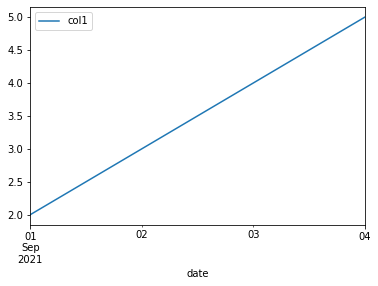

In [16]:
ddf.plot() # пример графика

#### Арифметические операторы

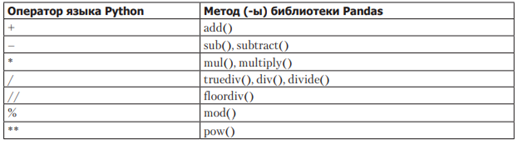

In [17]:
s = pd.Series([1, 3, 5, 7])
s

0    1
1    3
2    5
3    7
dtype: int64

In [18]:
s + 1 # к каждому элементу прибавляем 1

0    2
1    4
2    6
3    8
dtype: int64

In [19]:
s * 2 # каждый элемент умножаем на 2

0     2
1     6
2    10
3    14
dtype: int64

In [20]:
s.mul(2) # каждый элемент умножаем на 2 с помощью метода

0     2
1     6
2    10
3    14
dtype: int64

In [21]:
d = pd.DataFrame([[1, 3, 5],[0, 4, 2]])
d

,0,1,2
0,1,3,5
1,0,4,2


In [22]:
d*3/2 # каждый элемент умножили на 3 и поделили на 2

,0,1,2
0,1.5,4.5,7.5
1,0.0,6.0,3.0


In [23]:
np.multiply(s, 2) # каждый элемент s умножаем на 2 с помощью функции multiply из numpy

0     2
1     6
2    10
3    14
dtype: int64

In [24]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662, 'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127}, name='population')

In [25]:
area # в этой серии нет New York

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64

In [26]:
population # в этой серии нет Alaska

California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64

In [27]:
population/area # объединение индексов двух исходных серий
# обратите внимание на Alaska и New York

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [28]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [29]:
A.add(B, fill_value=0) # функции позволяют задать явным образом значения заполнителей

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [30]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)), columns=list('ab'))
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)), columns=list('abc'))

In [31]:
A

,a,b
0,3,6
1,7,5


In [32]:
B

,a,b,c
0,3,1,8
1,0,9,0
2,2,3,8


In [33]:
A + B # т.к. в А нет столбца с и строки 2, получается NaN

,a,b,c
0,6.0,7.0,NaN
1,7.0,14.0,NaN
2,NaN,NaN,NaN


In [34]:
A.add(B, fill_value=0) # полагаем, что в А есть столбец с и строка 2 и они заполнены 0

,a,b,c
0,6.0,7.0,8.0
1,7.0,14.0,0.0
2,2.0,3.0,8.0


In [35]:
A

,a,b
0,3,6
1,7,5


In [36]:
C = pd.Series([1, 3], index = ['a', 'b'])

In [37]:
C

a    1
b    3
dtype: int64

In [38]:
# Работает транслирование
A - C # вычитание выполнено построчно

,a,b
0,2,3
1,6,2


In [39]:
A.subtract(A['a'], axis=0) # вычитание по столбцам

,a,b
0,0,3
1,0,-2


#### Обработка данных в Pandas

- drop() – позволяет удалить столбец или строку.  
- drop_duplicates() – удаляет повторяющиеся строки.   
- isnull() – генерирует булеву маску для отсутствующих значений.  
- notnull() – противоположность метода isnull().  
- dropna() – удаляет строки, содержащие пропущенные значения, если установить параметр axis = 1, то удалятся столбцы, в которых есть пропуски.  
- fillna() – возвращает копию данных, в которой пропущенные значения заполнены или восстановлены.  


In [40]:
df = pd.DataFrame({'name': ['Anna', 'Maria', 'Ivan', 'Anna', 'Petr'], 'age': [20, np.nan, 35, 20, None], 
                   'city': ['Barnaul', 'Barnaul', 'Barnaul', 'Barnaul', 'Barnaul']})
df

,name,age,city
0,Anna,20.0,Barnaul
1,Maria,NaN,Barnaul
2,Ivan,35.0,Barnaul
3,Anna,20.0,Barnaul
4,Petr,NaN,Barnaul


In [41]:
df.drop('city', axis = 1) # удаляем столбец

,name,age
0,Anna,20.0
1,Maria,NaN
2,Ivan,35.0
3,Anna,20.0
4,Petr,NaN


In [42]:
df.drop(4) # удаляем строку

,name,age,city
0,Anna,20.0,Barnaul
1,Maria,NaN,Barnaul
2,Ivan,35.0,Barnaul
3,Anna,20.0,Barnaul


In [43]:
df.isnull() # True - значение пропущено

,name,age,city
0,False,False,False
1,False,True,False
2,False,False,False
3,False,False,False
4,False,True,False


In [44]:
df.notnull() # False - значение пропущено

,name,age,city
0,True,True,True
1,True,False,True
2,True,True,True
3,True,True,True
4,True,False,True


In [45]:
df.drop_duplicates() # удаляет повторяющиеся строки

,name,age,city
0,Anna,20.0,Barnaul
1,Maria,NaN,Barnaul
2,Ivan,35.0,Barnaul
4,Petr,NaN,Barnaul


In [46]:
df.dropna() # удаляет строки с пропусками

,name,age,city
0,Anna,20.0,Barnaul
2,Ivan,35.0,Barnaul
3,Anna,20.0,Barnaul


In [47]:
df.fillna('Hello!') # заполняет пропуски указанным значением

,name,age,city
0,Anna,20,Barnaul
1,Maria,Hello!,Barnaul
2,Ivan,35,Barnaul
3,Anna,20,Barnaul
4,Petr,Hello!,Barnaul


#### Агрегирование

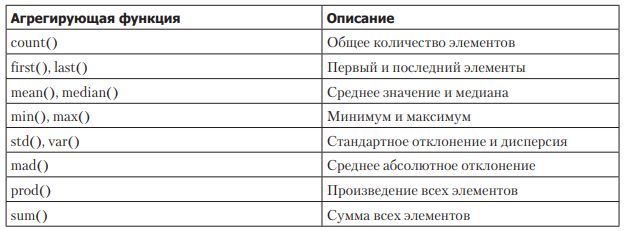

In [48]:
df

,name,age,city
0,Anna,20.0,Barnaul
1,Maria,NaN,Barnaul
2,Ivan,35.0,Barnaul
3,Anna,20.0,Barnaul
4,Petr,NaN,Barnaul


In [49]:
df['age'].max() # максимальное значение в столбце age

35.0

In [50]:
df['age'].mean() # среднее значение в столбце age

25.0

In [51]:
df.describe() # возвращает значение основных статистик

,age
count,3.000000
mean,25.000000
std,8.660254
min,20.000000
25%,20.000000
50%,20.000000
75%,27.500000
max,35.000000


#### Группировка

In [52]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [53]:
df.groupby(['Animal']) # группируем по Animal

In [54]:
df.groupby(['Animal']).mean() # вычислим среднюю скорость

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [55]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data1': range(6), 'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [56]:
df.groupby(['key']).sum() # группируем и суммируем

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


In [57]:
# aggregate() позволяет вычислять сразу несколько показателей
df.aggregate(['min', 'max'])

,key,data1,data2
min,A,0,0
max,C,5,9


In [58]:
# agg() псевдоним aggregate() 
df.groupby('key').agg(['min', 'max'])

data1     data2    
      min max   min max
key                    
A       0   3     3   5
B       1   4     0   7
C       2   5     3   9

In [59]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'}) # для data1 вычислим min, а для data2 max

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [60]:
# фильтрация значений 
def f(x):
    return x['data2'].mean() > 4

df.groupby('key').filter(f)

,key,data1,data2
2,C,2,3
5,C,5,9


In [61]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


In [62]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [63]:
# transform позволяет преобразовать значения с помощью указанной функции
df['data1'].transform(np.sqrt)

0    0.000000
1    1.000000
2    1.414214
3    1.732051
4    2.000000
5    2.236068
Name: data1, dtype: float64

In [64]:
# преобразуем значения data1 и data2 
df.groupby('key').transform(np.sum)

,data1,data2
0,3,8
1,5,7
2,7,12
3,3,8
4,5,7
5,7,12


In [65]:
df.groupby('key').sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


In [66]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [67]:
# apply позволяет применять произвольную функцию
df[['data1','data2']].apply(np.sum)

data1    15
data2    27
dtype: int64

#### Работа со строками в Pandas

In [68]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

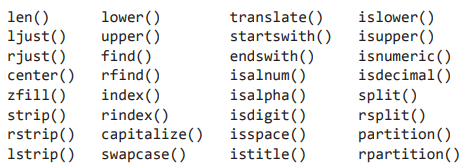

In [69]:
monte.str.len() # количество символов в строке

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [70]:
monte.str.lower() # приведение к нижнему регистру

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [71]:
monte.str.split() # разбиение

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [72]:
df = pd.DataFrame({'name': ['Anna', 'Ivan', 'Marina'], 'smoke': ['smoke', 'no smoke', 'no smoke']})
df

,name,smoke
0,Anna,smoke
1,Ivan,no smoke
2,Marina,no smoke


In [73]:
df['smoke'] = df['smoke'].replace({'smoke': 1, 'no smoke': 0}) # заменим на числовые значения

In [74]:
df

,name,smoke
0,Anna,1
1,Ivan,0
2,Marina,0


#### Соединение данных

In [75]:
s1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
s2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])

In [76]:
s1

1    A
2    B
3    C
dtype: object

In [77]:
s2

4    D
5    E
6    F
dtype: object

In [78]:
pd.concat([s1, s2]) # соединяем два объекта Series

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [79]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])

In [80]:
df1

,letter,number
0,a,1
1,b,2


In [81]:
df2

,letter,number
0,c,3
1,d,4


In [82]:
pd.concat([df1, df2]) # соединяем два DataFrame по нулевой оси

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [83]:
df1.append(df2) # можно использовать метод append

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [84]:
df3 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
df3

,animal,name
0,bird,polly
1,monkey,george


In [85]:
pd.concat([df1, df3], axis=1) # соединим по первой оси

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


In [86]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number1'])
df2 = pd.DataFrame([['a', 3], ['b', 4]], columns=['letter', 'number2'])

In [87]:
df1

,letter,number1
0,a,1
1,b,2


In [88]:
df2

,letter,number2
0,a,3
1,b,4


In [89]:
pd.merge(df1, df2)
# merge нашел общий столбец letter и объединил по нему

,letter,number1,number2
0,a,1,3
1,b,2,4


In [90]:
df1 = pd.DataFrame({'students': ['Maria', 'Petr', 'Ivan', 'Ekaterina'], 'group': [1, 2, 3, 1]})
df2 = pd.DataFrame({'group': [1, 2, 3], 'teacher': ['Olga', 'Denis', 'Luba']})

In [91]:
df1 # студенты и группы, в которых они учатся

,students,group
0,Maria,1
1,Petr,2
2,Ivan,3
3,Ekaterina,1


In [92]:
df2 # группа и преподаватель этой группы

,group,teacher
0,1,Olga
1,2,Denis
2,3,Luba


In [93]:
pd.merge(df1, df2) 
# teacher Olga для всех студентов студентов из group 1

,students,group,teacher
0,Maria,1,Olga
1,Ekaterina,1,Olga
2,Petr,2,Denis
3,Ivan,3,Luba
